In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_model_optimization as tfmot
import tensorflow as tf
import os
import tempfile
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [2]:
dataset = pd.read_excel('train_0.5s_delay.xlsx').values

In [3]:
train_percentage = 80
val_percentage = 20
def slice_dataset(dataset, percentage):
    data_size = len(dataset)
    index = [i for i in range (len(dataset))]
    np.random.shuffle(index)
    dataset_random = dataset[index,:]
    return dataset_random[:int(data_size*percentage/100)],dataset_random[int(data_size*percentage/100):]
train_dataset,val_dataset = slice_dataset(dataset, train_percentage)
X_train = np.expand_dims(train_dataset[:,0:2600].astype(float),axis =2)
Y_train = np.expand_dims(train_dataset[:,2600].astype(float),axis =1)
X_val = np.expand_dims(val_dataset[:,0:2600].astype(float),axis =2)
Y_val = np.expand_dims(val_dataset[:,2600].astype(float),axis =1)

In [36]:
f_input = 2600
f_output = 1
def setup_model():
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape =(f_input,1)),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.Flatten(),
        #eras.layers.Reshape(target_shape=(99,1,1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.01),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(f_output, activation='linear'),
    ])
    return model

In [37]:
base_model = setup_model()
base_model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mse'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor = 0.5, patience=20, mode='auto')
log_filepath = os.path.join('log')
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_filepath,histogram_freq=1)
history = base_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=200,batch_size=16,callbacks=[reduce_lr])
scores = base_model.evaluate(X_val, Y_val, verbose=0)
#model.save(os.path.join(log_filepath,'DNN_model.h5'))
print('%s: %.2f%%' % (base_model.metrics_names[1], scores[1] * 100))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - ETA: 0s - loss: 3.8680 - mse: 3.8680WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000023FE74F6828> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

Epoch 44/200
55/55 [==============================] - 4s 66ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.2526 - val_mse: 0.2526 - lr: 5.0000e-04
Epoch 45/200
55/55 [==============================] - 4s 69ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.2496 - val_mse: 0.2496 - lr: 5.0000e-04
Epoch 46/200
55/55 [==============================] - 3s 64ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.2806 - val_mse: 0.2806 - lr: 5.0000e-04
Epoch 47/200
55/55 [==============================] - 4s 67ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.2516 - val_mse: 0.2516 - lr: 5.0000e-04
Epoch 48/200
55/55 [==============================] - 4s 65ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.2555 - val_mse: 0.2555 - lr: 5.0000e-04
Epoch 49/200
55/55 [==============================] - 4s 65ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.2811 - val_mse: 0.2811 - lr: 5.0000e-04
Epoch 50/200
55/55 [==============================] - 4s 67ms/step - loss: 0.0194 - mse: 0.0194 - va

Epoch 99/200
55/55 [==============================] - 4s 65ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.2557 - val_mse: 0.2557 - lr: 6.2500e-05
Epoch 100/200
55/55 [==============================] - 4s 65ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.2545 - val_mse: 0.2545 - lr: 6.2500e-05
Epoch 101/200
55/55 [==============================] - 4s 66ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.2569 - val_mse: 0.2569 - lr: 6.2500e-05
Epoch 102/200
55/55 [==============================] - 4s 64ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.2571 - val_mse: 0.2571 - lr: 6.2500e-05
Epoch 103/200
55/55 [==============================] - 4s 67ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.2654 - val_mse: 0.2654 - lr: 6.2500e-05
Epoch 104/200
55/55 [==============================] - 4s 64ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.2622 - val_mse: 0.2622 - lr: 6.2500e-05
Epoch 105/200
55/55 [==============================] - 4s 64ms/step - loss: 0.0063 - mse: 0.006

55/55 [==============================] - 4s 66ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.2614 - val_mse: 0.2614 - lr: 1.5625e-05
Epoch 154/200
55/55 [==============================] - 4s 64ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.2577 - val_mse: 0.2577 - lr: 1.5625e-05
Epoch 155/200
55/55 [==============================] - 4s 69ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.2557 - val_mse: 0.2557 - lr: 7.8125e-06
Epoch 156/200
55/55 [==============================] - 4s 66ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.2564 - val_mse: 0.2564 - lr: 7.8125e-06
Epoch 157/200
55/55 [==============================] - 4s 65ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.2591 - val_mse: 0.2591 - lr: 7.8125e-06
Epoch 158/200
55/55 [==============================] - 4s 66ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.2580 - val_mse: 0.2580 - lr: 7.8125e-06
Epoch 159/200
55/55 [==============================] - 3s 63ms/step - loss: 0.0054 - mse: 0.0054 - val_loss:

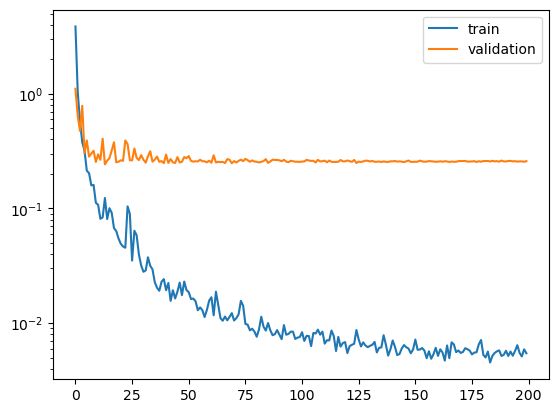

In [38]:
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [39]:
predicted =base_model.predict(X_val)
#inverse_data1 = min_max_scaler.inverse_transform(predicted)
#inverse_data2 = min_max_scaler.inverse_transform(Y_test)
print(predicted[1])
print(Y_val[1].reshape(1))
ERR = []
for i in range(0,len(Y_val)):
    error=(predicted[i]-Y_val[i].reshape(1))
    ERR.append(error)
ERR=np.abs(np.array(ERR))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 26ms/step
[5.1260533]
[5.5]


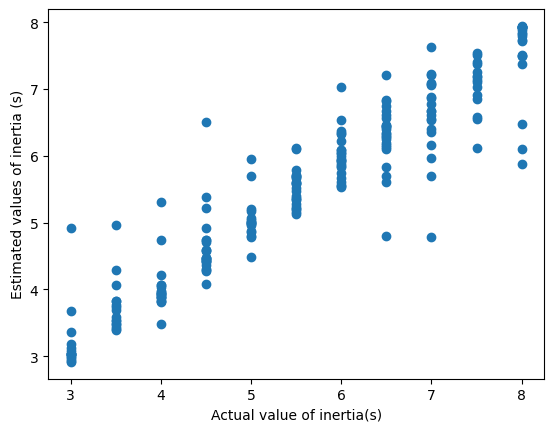

In [40]:
plt.xlabel('Actual value of inertia(s)')
plt.ylabel('Estimated values of inertia (s)')
plt.scatter(Y_val,predicted)
plt.savefig('Scatters_CNN_Delay_0.5.png',dpi=1000)
plt.show()


In [41]:
#print(ERR)
absvalues  = ERR.reshape(-1)
def acc(thre):
    Accuracy = np.sum(absvalues<=thre)/len(absvalues)
    return  Accuracy
print('\nTolerance=0.1: Accuracy=',  acc(0.1),
      '\nTolerance=0.2: Accuracy=',  acc(0.2),
      '\nTolerance=0.3: Accuracy=',  acc(0.3),
    '\nTolerance=0.4: Accuracy=', acc(0.4),'\nTolerance=0.5: Accuracy=',  acc(0.5))


Tolerance=0.1: Accuracy= 0.36363636363636365 
Tolerance=0.2: Accuracy= 0.5318181818181819 
Tolerance=0.3: Accuracy= 0.6681818181818182 
Tolerance=0.4: Accuracy= 0.7727272727272727 
Tolerance=0.5: Accuracy= 0.8136363636363636


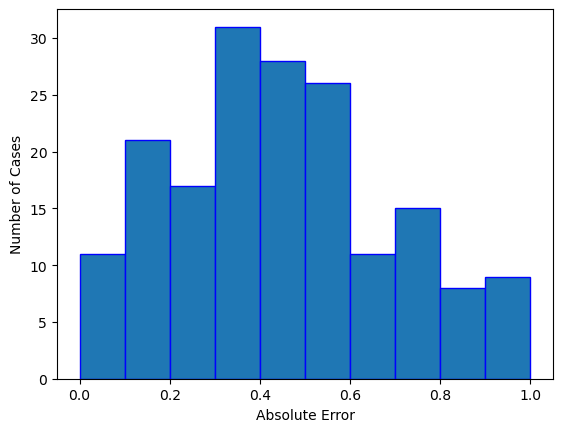

In [16]:
plt.hist(ERR.reshape(-1),bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],edgecolor='b')
plt.ylabel('Number of Cases')
plt.xlabel('Absolute Error')
plt.savefig('Dist_CNN_delay0.5.png',dpi=1000)